### Линейная классификация

Сначала загрузим данные, разделим на обучние и контроль, построим модель логистической регрессии:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_excel("https://github.com/nadiinchi/intro_sklearn/raw/master/scoring.xlsx")

In [3]:
data.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,1311.0,2,2,1,4,34.0,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,1552.0,1,3,1,1,31.0,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,451.0,1,3,1,4,21.0,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,4036.0,0,1,1,3,25.0,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,909.5,1,2,1,4,37.0,1,...,1,1,1,0,0,0,0,1,education,0


In [4]:
X = data[data.columns[:-2]]
y = data["target"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
preds = model.predict_proba(X_te)[:, 1]

In [6]:
preds[:10]

array([0.45041925, 0.25461319, 0.86169152, 0.45018748, 0.44360589,
       0.16453004, 0.58229558, 0.50940291, 0.20009679, 0.16097233])

### Строим кривые качества

In [7]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [8]:
fpr, tpr, thresholds = roc_curve(y_te, preds, pos_label=1)

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0,0.5,'TPR')

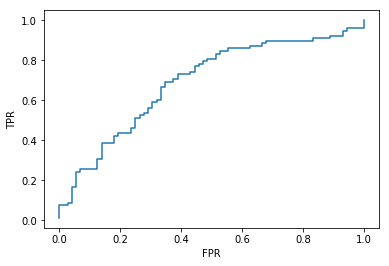

In [10]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [11]:
precision, recall, thresholds = precision_recall_curve(y_te, preds)

Text(0,0.5,'precision')

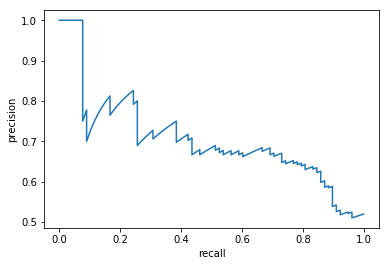

In [12]:
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

### Логистическая регрессия и порог на вероятность

In [ ]:
preds = model.predict_proba(X_test)
print(preds.shape)
preds = preds[:, 1] # select the probability of class 1 - second column

In [14]:
preds[:10]

array([0.45041925, 0.25461319, 0.86169152, 0.45018748, 0.44360589,
       0.16453004, 0.58229558, 0.50940291, 0.20009679, 0.16097233])

Можно сравнить вероятности с порогом и получить метки класса:

In [23]:
(preds>0.5).astype(int)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

Попробуем разные пороги и проследим за точностью и полнотой:

Text(0,0.5,'Точность или полнота')

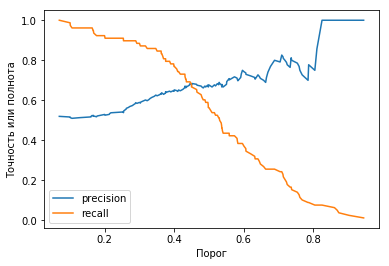

In [16]:
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.legend()
plt.xlabel("Порог")
plt.ylabel("Точность или полнота")

__Задание__: постройте такой же график самостоятельно (используя цикл по порогам)

In [19]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

In [ ]:
n_threshs = 1000
threshs = np.linspace(0, 1, n_threshs)
prec = np.zeros(n_threshs)
recs = np.zeros(n_threshs)
# выполните цикл по порогам, вычислите точность и полноту, заполните массив



